# 3. Classification and Regression on the Heart Disease Dataset
### Assignment Task:
    - Use the Heart Disease dataset to perform both classification and regression tasks.
        • Classification: Predict whether a patient has heart disease (binary classification) using Random Forest Classifier.
        • Regression: Predict the patient's maximum heart rate achieved during exercise using a Random Forest Regressor.
    - Perform feature engineering to handle missing data, and try techniques like feature scaling and one-hot encoding for categorical variables.
### Additional Challenges:
    - Visualize the decision boundaries for the classifier.
    - Compare the model’s performance against a baseline classifier (like k-NN) and regressor (like linear regression).

In [2]:
import pandas as pd

df_heart_failure = pd.read_csv('./../datafiles/heart_failure_clinical_records_dataset.csv')

df_heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df_heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df_heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
X = df_heart_failure.drop(columns=['DEATH_EVENT'])
y = df_heart_failure['DEATH_EVENT']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Random Forest Classification

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [12]:
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [13]:
y_pred = rf_classifier.predict(x_test_scaled)

y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [14]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[31  4]
 [15 10]]


In [15]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.77        35
           1       0.71      0.40      0.51        25

    accuracy                           0.68        60
   macro avg       0.69      0.64      0.64        60
weighted avg       0.69      0.68      0.66        60



## Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)

In [17]:
rf_regressor.fit(x_train_scaled, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [18]:
y_pred = rf_regressor.predict(x_test_scaled)

y_pred

array([0.6, 0. , 0.1, 0.9, 0. , 0. , 0.4, 0.1, 0.9, 0.2, 0. , 0.1, 0.2,
       0. , 0.9, 0.8, 0. , 0. , 0.8, 0.5, 0.4, 0.3, 0.6, 0.9, 1. , 0. ,
       0. , 0. , 0.2, 0. , 0.8, 0. , 1. , 1. , 1. , 0.8, 0. , 0.1, 0. ,
       0. , 0.2, 0.7, 0. , 0. , 0.8, 0.1, 0.7, 0. , 0. , 0. , 0.5, 0. ,
       0.2, 0. , 0.5, 0.3, 0.1, 1. , 0. , 1. ])

In [19]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error:\n", mean_squared_error(y_test, y_pred))

Mean Squared Error:
 0.20750000000000002


In [20]:
from sklearn.metrics import r2_score

print("R2 Score:\n", r2_score(y_test, y_pred))

R2 Score:
 0.14628571428571413


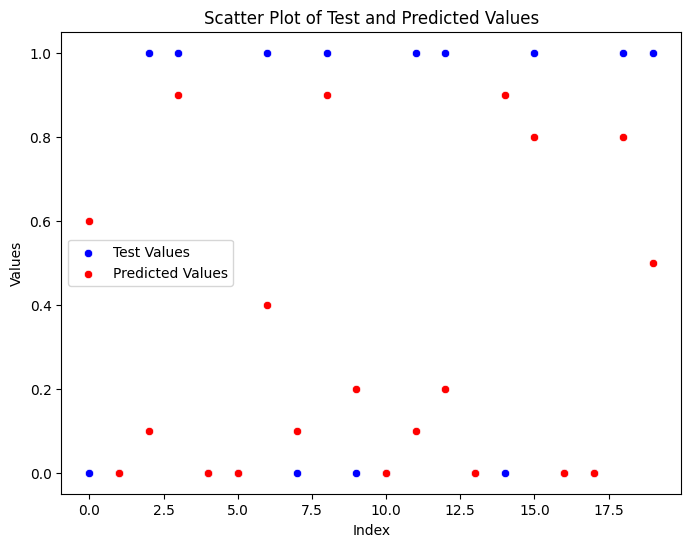

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with indices and values for both y_test and y_pred
df = pd.DataFrame({
    'Index': range(len(y_test[:20])),  # x-axis (index)
    'y_test': y_test[:20],             # y-axis (test values)
    'y_pred': y_pred[:20]              # y-axis (predicted values)
})

# Plot the scatter plot
plt.figure(figsize=(8,6))  # Set the figure size

# Scatter plot for y_test
sns.scatterplot(x='Index', y='y_test', data=df, color='blue', label='Test Values')

# Scatter plot for y_pred
sns.scatterplot(x='Index', y='y_pred', data=df, color='red', label='Predicted Values')

# Add legend
plt.legend()

# Add titles and labels
plt.title('Scatter Plot of Test and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Show the plot
plt.show()

## KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=7) 

In [24]:
model_knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [25]:
y_pred_knn = model_knn.predict(x_test_scaled)

y_pred_knn

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[35  0]
 [19  6]]


In [27]:
class_report = classification_report(y_test, y_pred_knn)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        35
           1       1.00      0.24      0.39        25

    accuracy                           0.68        60
   macro avg       0.82      0.62      0.59        60
weighted avg       0.79      0.68      0.62        60



## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

model_lin_reg=LinearRegression()

In [31]:
model_lin_reg.fit(x_train_scaled, y_train)

LinearRegression()

In [33]:
y_pred_lin = model_lin_reg.predict(x_test_scaled)

y_pred_lin

array([ 1.59454523e-01, -1.49419842e-01,  2.59983035e-01,  1.57811735e+00,
        2.70246289e-01,  9.01651901e-03,  5.30230158e-01,  2.77645477e-01,
        8.35598096e-01,  2.22785487e-01,  2.82316049e-01,  1.52483699e-01,
        2.34064096e-01,  3.34458071e-01,  3.59298374e-01,  5.40445515e-01,
        1.07205565e-01,  4.01799787e-01,  2.80316830e-01,  4.30287151e-01,
        4.39945400e-01,  3.83370106e-01,  2.89736899e-01,  5.42823862e-01,
        5.23282053e-01, -1.51688172e-01,  2.27678646e-02,  1.67335855e-01,
        2.30512266e-01, -8.87676415e-02,  6.90189280e-01, -7.92389432e-02,
        6.11949125e-01,  8.77843204e-01,  5.66970115e-01,  4.07240062e-01,
        2.79978783e-01,  2.13119122e-01,  3.62729948e-01,  1.39419107e-01,
        4.85441792e-01,  7.70522494e-01,  2.02154916e-01,  2.63297211e-01,
        4.97917385e-01,  2.24099424e-01,  3.38293828e-01,  5.04509745e-02,
        7.95987323e-02, -1.74704394e-02,  5.05845954e-01,  1.46231244e-03,
        5.24332354e-01, -

In [34]:
print("Mean Squared Error:\n", mean_squared_error(y_test, y_pred_lin))

Mean Squared Error:
 0.17868807219099947


In [35]:
print("R2 Score:\n", r2_score(y_test, y_pred_lin))

R2 Score:
 0.2648262172713164


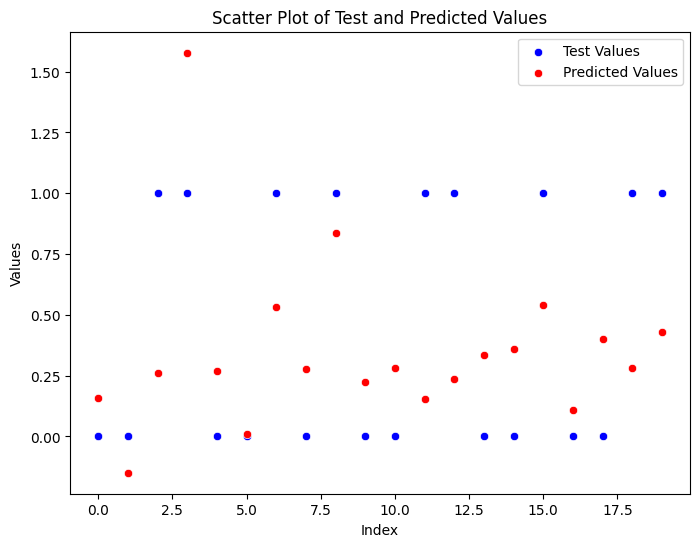

In [36]:
# Create a DataFrame with indices and values for both y_test and y_pred
df = pd.DataFrame({
    'Index': range(len(y_test[:20])),  # x-axis (index)
    'y_test': y_test[:20],             # y-axis (test values)
    'y_pred': y_pred_lin[:20]              # y-axis (predicted values)
})

# Plot the scatter plot
plt.figure(figsize=(8,6))  # Set the figure size

# Scatter plot for y_test
sns.scatterplot(x='Index', y='y_test', data=df, color='blue', label='Test Values')

# Scatter plot for y_pred
sns.scatterplot(x='Index', y='y_pred', data=df, color='red', label='Predicted Values')

# Add legend
plt.legend()

# Add titles and labels
plt.title('Scatter Plot of Test and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Show the plot
plt.show()